This tutorial will highligh the major viz related features of Datamol.

In [30]:
import datamol as dm

First let's get a dataset.

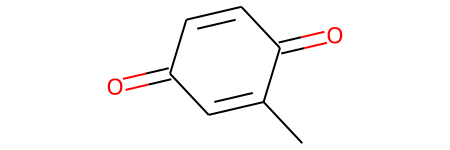

In [2]:
data = dm.read_csv(
    "https://raw.githubusercontent.com/rdkit/rdkit/master/Data/NCI/first_200.tpsa.csv",
    comment="#",
    header=None,
)
data.columns = ["smiles", "tpsa"]

# Create a mol column
with dm.without_rdkit_log():
    data["mol"] = data["smiles"].apply(dm.to_mol)

# Patch the dataframe to render the molecules in it
dm.render_mol_df(data)

data.iloc[0]["mol"]

Now let's cluster the molecules and only keep the first cluster.

In [3]:
cluster_indices, cluster_mols = dm.cluster_mols(data["mol"].dropna().tolist(), cutoff=0.7)
mols = cluster_mols[1]

Display the molecules of the cluster while aligning then using MCS. This can be done using a simple boolean flag in `dm.to_image()`.

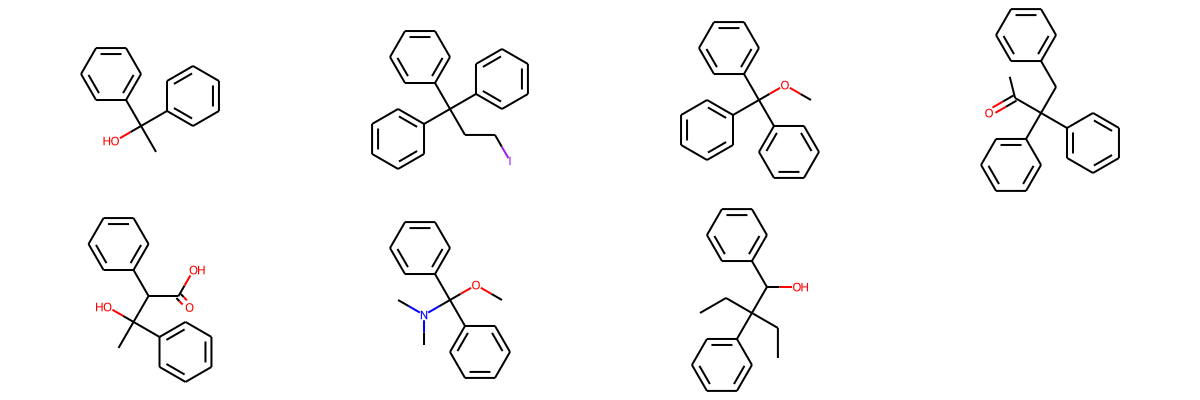

In [4]:
dm.to_image(mols, mol_size=(300, 200), align=True, use_svg=False)

#### Lasso Highlighting
The code below will show how the lasso highlight function should be used. The signature for this function is
```
def lasso_highlight_image(
    canvas_width: int, 
    canvas_height: int,
    target_molecule: Union[str, dm.Mol],
    search_molecules: Union[str, List[str], dm.Mol, List[dm.Mol]]
    ) -> Image:
```
The canvas is the size of the image returned and the target molecule is accepted in the smiles format or mol object and the substructure search as smarts string or mol object. 

It is quite difficult to test the production of images so the edge cases will be entered here with a brief description of each


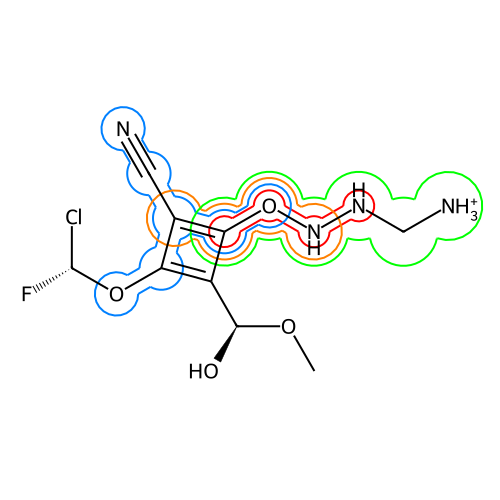

In [3]:
#TEST all valid strings for this molecule

# Exemplary molecule
smi = 'CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]'
# List of exemplpary substructures
smarts_list = ['CONN','N#CC~CO', 'C=CON', 'CONNCN']

dm.lasso_highlight_image(500, 500, smi, smarts_list)

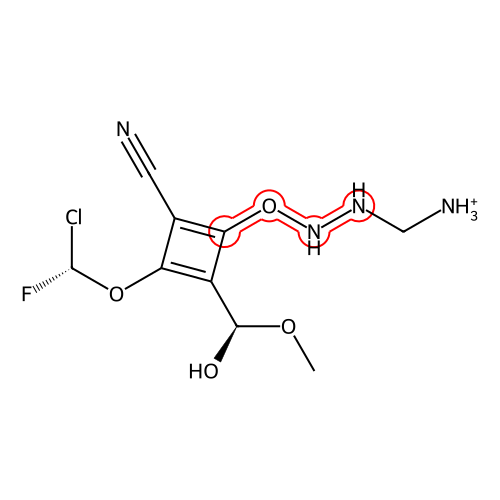

In [31]:
#Test just one valid string for this molecule entered as a list

# Exemplary molecule
smi = 'CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]'
# List of exemplpary substructures
smarts_list = ['CONN']

dm.lasso_highlight_image(500, 500, smi, smarts_list)


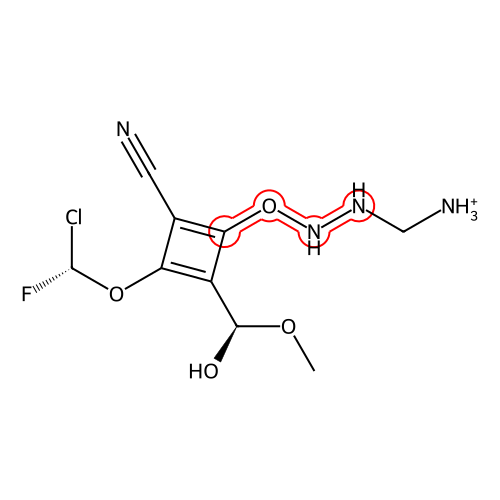

In [32]:
#Test just one valid string for this molecule entered as a str

# Exemplary molecule
smi = 'CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]'
# List of exemplpary substructures
smarts_list = 'CONN'

dm.lasso_highlight_image(500, 500, smi, smarts_list)

In [33]:
#Test both groups entered as mol objects

# Exemplary molecule
smi = dm.to_mol('CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]')
# List of exemplpary substructures
smarts_list = dm.to_mol('CONN')

dm.lasso_highlight_image(500, 500, smi, smarts_list)

TypeError: 'Mol' object is not subscriptable

In [4]:
#TEST Invalid smiles string inputted (put FDF at the beginning)

# Exemplary molecule
smi = 'FDFCO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]'
# List of exemplpary substructures
smarts_list = ['CONN','N#CC~CO', 'C=CON', 'CONNCN']

dm.lasso_highlight_image(500, 500, smi, smarts_list)

[16:48:19] SMILES Parse Error: syntax error while parsing: FDFCO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]
[16:48:19] SMILES Parse Error: Failed parsing SMILES 'FDFCO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]' for input: 'FDFCO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]'


ArgumentError: Python argument types in
    MolDraw2D.DrawMolecule(MolDraw2DCairo, NoneType)
did not match C++ signature:
    DrawMolecule(RDKit::MolDraw2D {lvalue} self, RDKit::ROMol mol, boost::python::api::object highlightAtoms, boost::python::api::object highlightBonds, boost::python::api::object highlightAtomColors=None, boost::python::api::object highlightBondColors=None, boost::python::api::object highlightAtomRadii=None, int confId=-1, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > legend='')
    DrawMolecule(RDKit::MolDraw2D {lvalue} self, RDKit::ROMol mol, boost::python::api::object highlightAtoms=None, boost::python::api::object highlightAtomColors=None, boost::python::api::object highlightAtomRadii=None, int confId=-1, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > legend='')

In [5]:
#Test invalid smarts string (put fdf at the beginning of a smarts string)

# Exemplary molecule
smi = 'CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]'
smi =dm.to_mol(smi)
# List of exemplpary substructures
smarts_list = ['FDFCONN','N#CC~CO', 'C=CON', 'CONNCN']

dm.lasso_highlight_image(500, 500, smi, smarts_list)

[16:49:03] SMARTS Parse Error: syntax error while parsing: FDFCONN
[16:49:03] SMARTS Parse Error: Failed parsing SMARTS 'FDFCONN' for input: 'FDFCONN'


ArgumentError: Python argument types in
    Mol.GetSubstructMatches(Mol, NoneType)
did not match C++ signature:
    GetSubstructMatches(RDKit::ROMol self, RDKit::MolBundle query, RDKit::SubstructMatchParameters params)
    GetSubstructMatches(RDKit::ROMol self, RDKit::ROMol query, RDKit::SubstructMatchParameters params)
    GetSubstructMatches(RDKit::ROMol self, RDKit::MolBundle query, bool uniquify=True, bool useChirality=False, bool useQueryQueryMatches=False, unsigned int maxMatches=1000)
    GetSubstructMatches(RDKit::ROMol self, RDKit::ROMol query, bool uniquify=True, bool useChirality=False, bool useQueryQueryMatches=False, unsigned int maxMatches=1000)

In [22]:
#Test smarts with one substructure not present in molecule

# Exemplary molecule
smi = 'CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]'
smi =dm.to_mol(smi)
# List of exemplpary substructures
smarts_list = ['CCCCCC', 'CONN', 'N#CC~CO', 'C=CON']

dm.lasso_highlight_image(500, 500, smi, smarts_list)

TypeError: unbound method set.union() needs an argument

In [16]:
#Test smarts with only substructures not present in molecule

# Exemplary molecule
smi = 'CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]'
smi =dm.to_mol(smi)
# List of exemplpary substructures
smarts_list = ['CCCCCC']

dm.lasso_highlight_image(500, 500, smi, smarts_list)

TypeError: unbound method set.union() needs an argument

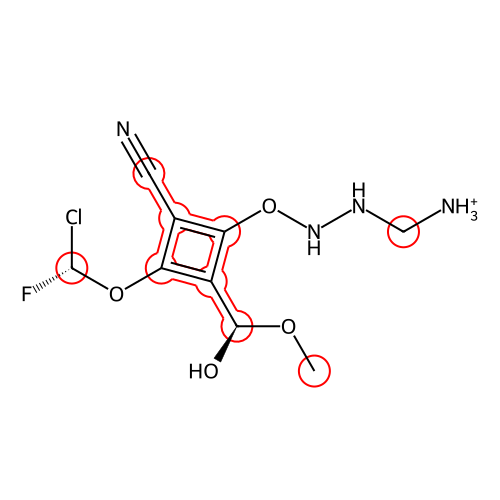

In [17]:
#Test smarts with just one atom

# Exemplary molecule
smi = 'CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]'
smi =dm.to_mol(smi)
# List of exemplpary substructures
smarts_list = ['C']

dm.lasso_highlight_image(500, 500, smi, smarts_list)

In [26]:
#Test smarts with more substructures than colors (6 colors need 7 substructures)

# Exemplary molecule
smi = 'CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]'
smi =dm.to_mol(smi)
# List of exemplpary substructures
smarts_list = ['CONN','N#CC~CO', 'C=CON', 'CONNCN', 'NN', 'CON', 'CCl']

dm.lasso_highlight_image(500, 500, smi, smarts_list)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/desmondgilmour/opt/anaconda3/envs/envDatamol/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/sh/821vt6gs0_j_hh0vyqk87wx00000gn/T/ipykernel_83002/3846483231.py", line 9, in <module>
    dm.lasso_highlight_image(500, 500, smi, smarts_list)
  File "/Users/desmondgilmour/Documents/Connected_to_git/datamol/datamol/viz/_lasso_highlight.py", line 374, in lasso_highlight_image
  File "/Users/desmondgilmour/Documents/Connected_to_git/datamol/datamol/viz/_lasso_highlight.py", line 294, in _draw_multi_matches
    raise ValueError("Not enough colors for referenced substructures!")
ValueError: Not enough colors for referenced substructures!

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/desmondgilmour/opt/anaconda3/envs/envDatamol/lib/python3.11/site-packages/IPytho

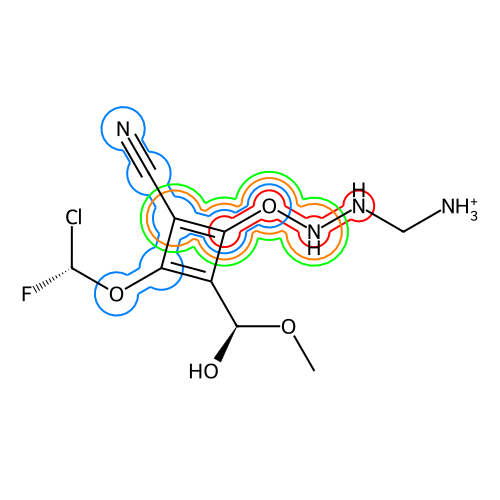

In [27]:
#Test if smarts have been entered twice (Should remove duplicates maybe)

# Exemplary molecule
smi = 'CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]'
smi =dm.to_mol(smi)
# List of exemplpary substructures
smarts_list = ['CONN','N#CC~CO', 'C=CON', 'C=CON']

dm.lasso_highlight_image(500, 500, smi, smarts_list)

In [28]:
#Test if no smarts are entered

# Exemplary molecule
smi = 'CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]'
smi =dm.to_mol(smi)
# List of exemplpary substructures
smarts_list = []

dm.lasso_highlight_image(500, 500, smi, smarts_list)

IndexError: list index out of range

In [29]:
#Test if no smiles entered

# Exemplary molecule
smi = ''
smi =dm.to_mol(smi)
# List of exemplpary substructures
smarts_list = ['CONN','N#CC~CO', 'C=CON', 'C=CON']

dm.lasso_highlight_image(500, 500, smi, smarts_list)

TypeError: unbound method set.union() needs an argument